# Scenario Data Analysis
Use Base Env

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Scenario 4: positive tweets & income + age (General, Overall)

In [7]:
# s4_data data structure -- SA4_code:[total, posi, nega, neutral, percen_posi, percen_nega, percen_neutral, weekly_income, avg_age]
with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/s4_data.json', 'r') as file:
    s4_data = json.load(file)

In [8]:
SA4_code = []
total_num_tweet = []
percentage_posi = []
weekly_income = []
age = []

for item in s4_data:
    SA4_code.append(item)
    total_num_tweet.append(s4_data[item][0])
    percentage_posi.append(s4_data[item][4])
    weekly_income.append(s4_data[item][7])
    age.append(s4_data[item][8])

selected_data = {
    'SA4_code': SA4_code,
    'total_num_tweet': total_num_tweet,
    'percentage_posi': percentage_posi,
    'weekly_income': weekly_income,
    'age': age
}

df = pd.DataFrame(selected_data)
df

,SA4_code,total_num_tweet,percentage_posi,weekly_income,age
0,101,9110,0.397366,797,45
1,102,688,0.441860,727,43
2,103,37704,0.449369,738,41
3,104,5175,0.382802,637,46
4,105,13221,0.366992,743,39
...,...,...,...,...,...
84,604,15299,0.360220,635,45
85,701,14883,0.413223,1120,34
86,702,11945,0.356132,539,31
87,801,56339,0.463161,1204,35


In [9]:
sum(total_num_tweet)  # total 2391731 tweets are in english and has SA4 code

2391731

In [10]:
x_income = df['weekly_income']
y_sentiment = df['percentage_posi']

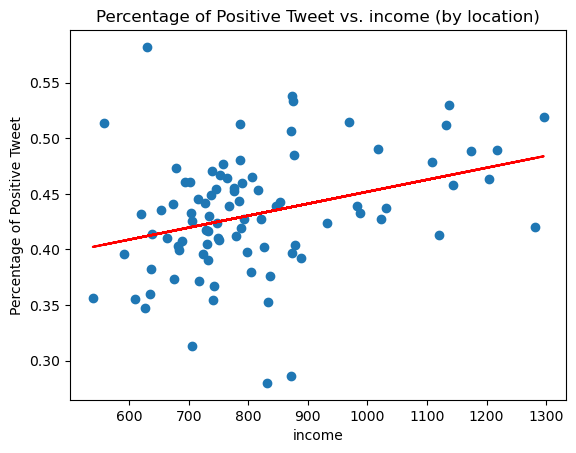

In [11]:
# Fit a linear regression line using NumPy
m, b = np.polyfit(x_income, y_sentiment, 1)

# Create the scatter plot
plt.scatter(x_income, y_sentiment)
plt.xlabel('income')
plt.ylabel('Percentage of Positive Tweet')
plt.title('Percentage of Positive Tweet vs. income (by location)')

# Add the linear regression line
plt.plot(x_income, m*x_income + b, color='red')

# Show the plot
plt.show()

In [12]:
x_age = df['age']
y_sentiment = df['percentage_posi']

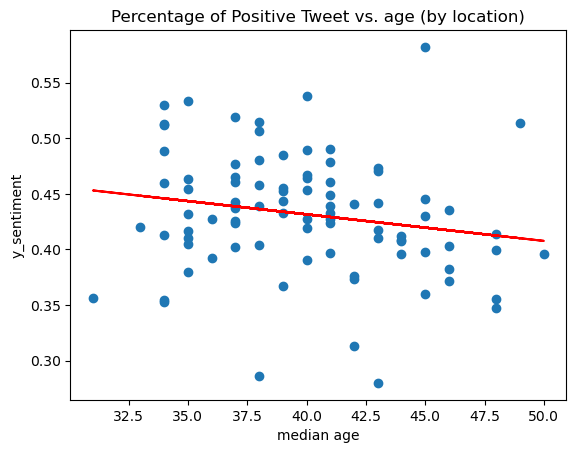

In [13]:
# Fit a quadratic model using NumPy
m, b = np.polyfit(x_age, y_sentiment, 1)
# quadratic_model = np.poly1d(coefficients)

# Create the scatter plot
plt.scatter(x_age, y_sentiment)
plt.xlabel('median age')
plt.ylabel('y_sentiment')
plt.title('Percentage of Positive Tweet vs. age (by location)')

# # Generate x values for the quadratic model line
# x_line = np.linspace(min(x_age), max(x_age), 100)

# Add the linear regression line
plt.plot(x_age, m*x_age + b, color='red')

# Show the plot
plt.show()

## Scenario 2: num of vehicle vs. sentiment towards traffic

In [14]:
# s2_data data structure -- SA4_code:[total_tweet_mentioned_vehicle, posi, nega, neutral, percen_posi, percen_nega, percen_neutral, avg_vehicle]
with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/s2_data.json', 'r') as file:
    s2_data = json.load(file)

In [15]:
SA4_code = []
total_tweet_vehicle = []
#
percentage_posi_vehicle = []
avg_vehicle = []

for item in s2_data:
    SA4_code.append(item)
    total_tweet_vehicle.append(s2_data[item][0])
    # posi_tweet_vehicle.append(s2_data[item][2])
    percentage_posi_vehicle.append(s2_data[item][4])
    avg_vehicle.append(s2_data[item][7])

selected_data_vehicle = {
    'SA4_code': SA4_code,
    'total_tweet_vehicle': total_tweet_vehicle,
    # 'posi_tweet_vehicle': posi_tweet_vehicle,
    'percentage_posi_vehicle': percentage_posi_vehicle,
    'avg_vehicle': avg_vehicle
}

vehicle_df = pd.DataFrame(selected_data_vehicle)
vehicle_df

,SA4_code,total_tweet_vehicle,percentage_posi_vehicle,avg_vehicle
0,101,258,0.426357,1.915886
1,102,28,0.535714,1.751766
2,103,1322,0.455371,1.873120
3,104,159,0.402516,1.783730
4,105,298,0.359060,1.787595
...,...,...,...,...
84,604,497,0.352113,1.844804
85,701,591,0.357022,1.832549
86,702,583,0.394511,1.381809
87,801,2911,0.660254,1.717555


In [16]:
x_avg_vehicle = vehicle_df['avg_vehicle']
y_sentiment_vehicle = vehicle_df['percentage_posi_vehicle']

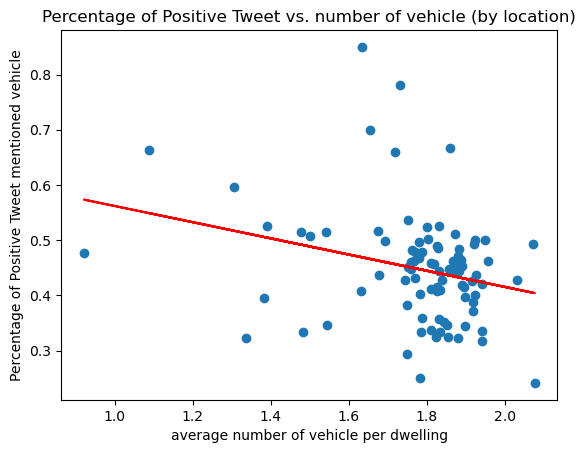

In [17]:
# Fit a linear regression line using NumPy
m, b = np.polyfit(x_avg_vehicle, y_sentiment_vehicle, 1)

# Create the scatter plot
plt.scatter(x_avg_vehicle, y_sentiment_vehicle)
plt.xlabel('average number of vehicle per dwelling')
plt.ylabel('Percentage of Positive Tweet mentioned vehicle')
plt.title('Percentage of Positive Tweet vs. number of vehicle (by location)')

# Add the linear regression line
plt.plot(x_avg_vehicle, m*x_avg_vehicle + b, color='red')

# Show the plot
plt.show()

In [ ]:
# Sort the DataFrame by 'food_retail_num'
fvehicle_df_sorted_df = vehicle_df.sort_values('avg_vehicle')

# Create a bar plot
plt.figure(figsize=(50, 6))
plt.bar(fvehicle_df_sorted_df['SA4_code'], fvehicle_df_sorted_df['avg_vehicle'])
plt.xlabel('SA4 Code')
plt.ylabel('avg_vehicle')
plt.title('avg_vehicle Number by SA4 Code')
plt.show()

#### income, avg vehicle, sentiment

In [18]:
income_vehi_senti_data = {
    # 'SA4_code': SA4_code,
    'weekly_income': weekly_income,
    'avg_vehicle': avg_vehicle,
    'percentage_posi_vehicle': percentage_posi_vehicle
}

income_vehi_senti_data_df = pd.DataFrame(income_vehi_senti_data)
income_vehi_senti_data_df.head()

,weekly_income,avg_vehicle,percentage_posi_vehicle
0,797,1.915886,0.426357
1,727,1.751766,0.535714
2,738,1.873120,0.455371
3,637,1.783730,0.402516
4,743,1.787595,0.359060


In [19]:
income_vehi_senti_data_correlation_matrix = income_vehi_senti_data_df.corr()

income_vehi_senti_data_correlation_matrix

,weekly_income,avg_vehicle,percentage_posi_vehicle
weekly_income,1.000000,-0.515560,0.211746
avg_vehicle,-0.515560,1.000000,-0.272291
percentage_posi_vehicle,0.211746,-0.272291,1.000000


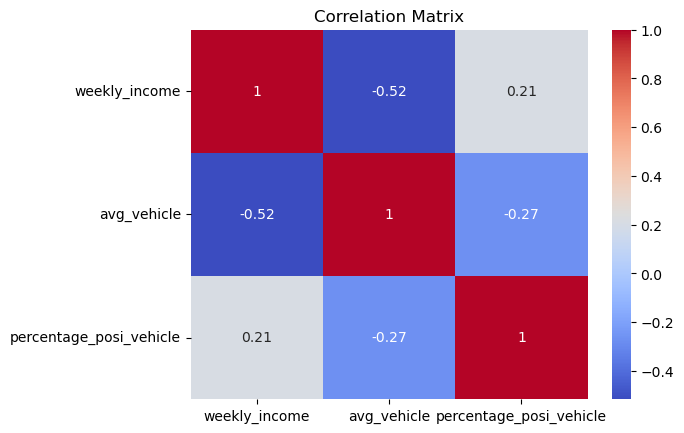

In [20]:
# Create a heatmap using seaborn
sns.heatmap(income_vehi_senti_data_correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


## Scenario 1: food

In [21]:
# s1_data data structure -- SA4_code:[total_tweet_mentioned_food, posi, nega, neutral, percen_posi, percen_nega, percen_neutral, food_retail_num]
with open('/Users/euniceyao/Documents/GitHub/CCC_A2/final_processed_data/s1_data.json', 'r') as file:
    s1_data = json.load(file)

In [22]:
SA4_code = []
total_tweet_food = []
percentage_posi_food = []
food_retail_num = []

for item in s1_data:
    SA4_code.append(item)
    total_tweet_food.append(s1_data[item][0])
    percentage_posi_food.append(s1_data[item][4])
    food_retail_num .append(s1_data[item][7])

selected_data_food = {
    'SA4_code': SA4_code,
    'total_tweet_food': total_tweet_food,
    # 'posi_tweet_vehicle': posi_tweet_vehicle,
    'percentage_posi_food': percentage_posi_food,
    'food_retail_num': food_retail_num
}

food_df = pd.DataFrame(selected_data_food)
food_df

,SA4_code,total_tweet_food,percentage_posi_food,food_retail_num
0,101,491,0.441955,5124.0
1,102,44,0.568182,7218.0
2,103,2076,0.431599,4428.0
3,104,299,0.464883,3315.0
4,105,554,0.391697,2846.0
...,...,...,...,...
84,604,833,0.415366,2790.0
85,701,750,0.461333,3706.0
86,702,792,0.448232,2593.0
87,801,3265,0.463400,8617.0


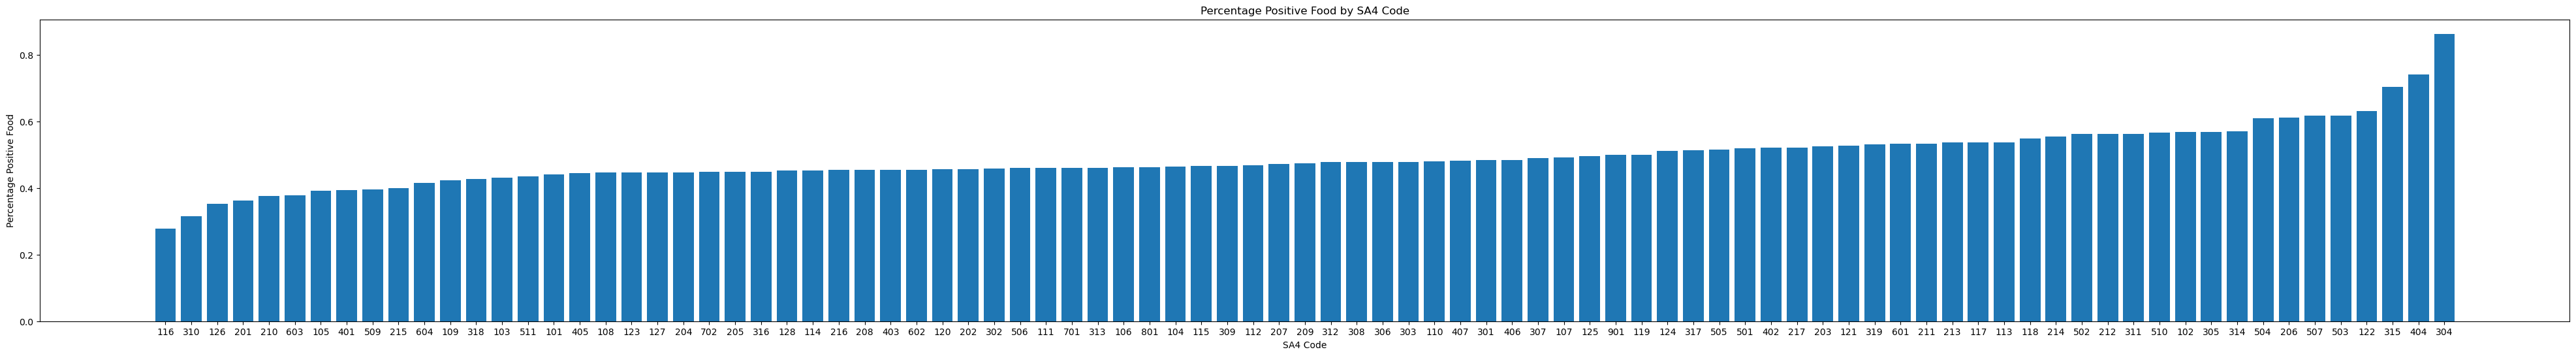

In [23]:
# Sort the DataFrame by the "percentage_posi_food" column
food_sorted_df = food_df.sort_values('percentage_posi_food')

# Plot a bar plot
plt.figure(figsize=(50, 6))
plt.bar(food_sorted_df['SA4_code'], food_sorted_df['percentage_posi_food'])
plt.xlabel('SA4 Code')
plt.ylabel('Percentage Positive Food')
plt.title('Percentage Positive Food by SA4 Code')
plt.show()

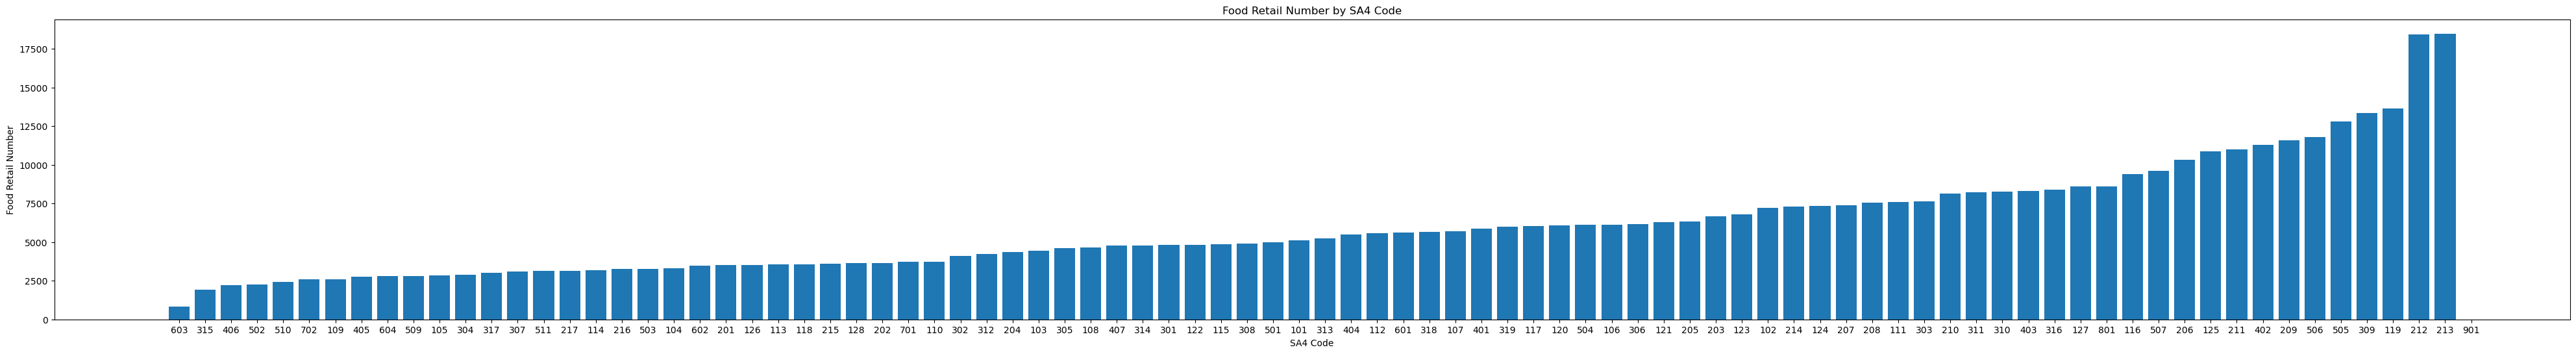

In [24]:
# Sort the DataFrame by 'food_retail_num'
food_retail_sorted_df = food_df.sort_values('food_retail_num')

# Create a bar plot
plt.figure(figsize=(50, 6))
plt.bar(food_retail_sorted_df['SA4_code'], food_retail_sorted_df['food_retail_num'])
plt.xlabel('SA4 Code')
plt.ylabel('Food Retail Number')
plt.title('Food Retail Number by SA4 Code')
plt.show()

In [25]:
# Get the top 10 rows with highest 'food_retail_num'
top_10_food_retail = food_retail_sorted_df.tail(10)

# Get the last 10 rows with lowest 'food_retail_num'
last_10_food_retail = food_retail_sorted_df.head(10)

top_10_food_senti = food_sorted_df.tail(10)

# Get the last 10 rows with lowest 'food_retail_num'
last_10_food_senti = food_sorted_df.head(10)

top_10_food_retail

,SA4_code,total_tweet_food,percentage_posi_food,food_retail_num
38,211,176,0.534091,11000.0
65,402,249,0.522088,11294.0
36,209,99,0.474747,11565.0
76,506,9592,0.460905,11773.0
75,505,66,0.515152,12799.0
53,309,4068,0.467306,13349.0
18,119,158,0.500000,13648.0
39,212,304,0.562500,18407.0
40,213,395,0.536709,18481.0
88,901,2,0.500000,NaN


In [26]:
top_10_food_senti

,SA4_code,total_tweet_food,percentage_posi_food,food_retail_num
49,305,176,0.568182,4629.0
58,314,21,0.571429,4769.0
74,504,59,0.610169,6111.0
33,206,604,0.612583,10336.0
77,507,47,0.617021,9592.0
73,503,68,0.617647,3277.0
21,122,68,0.632353,4817.0
59,315,132,0.704545,1926.0
67,404,31,0.741935,5495.0
48,304,22,0.863636,2893.0


In [27]:
last_10_food_retail

,SA4_code,total_tweet_food,percentage_posi_food,food_retail_num
83,603,119,0.378151,817.0
59,315,132,0.704545,1926.0
69,406,1711,0.483928,2200.0
72,502,16,0.562500,2246.0
79,510,374,0.566845,2444.0
86,702,792,0.448232,2593.0
8,109,246,0.422764,2596.0
68,405,435,0.445977,2756.0
84,604,833,0.415366,2790.0
78,509,442,0.395928,2800.0


In [28]:
last_10_food_senti

,SA4_code,total_tweet_food,percentage_posi_food,food_retail_num
15,116,18,0.277778,9401.0
54,310,514,0.315175,8249.0
25,126,17,0.352941,3510.0
28,201,1248,0.362981,3504.0
37,210,337,0.376855,8148.0
83,603,119,0.378151,817.0
4,105,554,0.391697,2846.0
64,401,373,0.394102,5870.0
78,509,442,0.395928,2800.0
42,215,323,0.399381,3606.0


In [29]:
x_food_retail= food_df['food_retail_num']
y_sentiment_food = food_df['percentage_posi_food']

Text(0.5, 1.0, 'Number of Food Retail VS. sentiment towards Food')

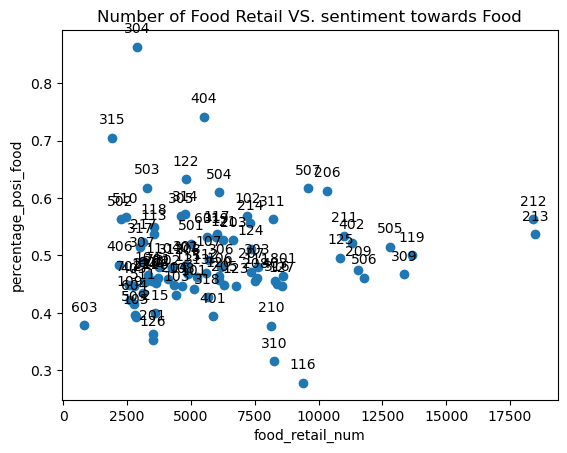

In [30]:
# Fit a linear regression line using NumPy
# m, b = np.polyfit(x_food_retail, y_sentiment_food, 1)

# Create the scatter plot
plt.scatter(x_food_retail, y_sentiment_food)



# Label each point
for i, label in enumerate(SA4_code):
    plt.annotate(label, (x_food_retail[i], y_sentiment_food[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.xlabel('food_retail_num')
plt.ylabel('percentage_posi_food')
plt.title('Number of Food Retail VS. sentiment towards Food')

# Add the linear regression line
# plt.plot(x_food_retail, m*x_food_retail + b, color='red')

# # Show the plot
# plt.show()